In [267]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import chain
from unidecode import unidecode

## Importando os dados para análise.

In [269]:
indicadores_covid = pd.read_csv('Indicadores Covid (Teste Técnico DQ).csv')

In [270]:
indicadores_covid.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
0,rM2yS1KeSg,2022-02-15,2022-02-09,"Tosse, Febre",Não,Parda,NaN,Feminino,SP,Barretos,2020-03-23,NaN,JANSSEN,NaN,45.0
1,KuQV22ighx,1900-01-01,2020-07-08,"Tosse, Dor de Garganta",Não,Parda,NaN,Feminino,NaN,Pilar,NaN,NaN,NaN,NaN,27.0
2,reZML6hwMz,2022-06-21,2022-05-27,"Tosse, Febre, Dor de Garganta, Outros",Não,Branca,MIALGIA,Feminino,SP,São Paulo,2026-01-05,2020-08-26,ASTRAZENECA/FIOCRUZ,ASTRAZENECA/FIOCRUZ,32.0
3,fJjnOzDbg6,1900-01-01,2020-07-22,"Dispneia, Outros",Não,Parda,CEFALEIA,Masculino,NaN,Pilar,NaN,NaN,NaN,NaN,26.0
4,zzq5HVGd17,2022-03-22,NaN,Assintomático,Sim,Branca,NaN,Masculino,SP,São Paulo,2026-01-05,NaN,ASTRAZENECA/FIOCRUZ,NaN,37.0


In [271]:
indicadores_covid.count()

source_id                        10499
dataNotificacao                  10490
dataInicioSintomas                9742
sintomas                         10467
profissionalSaude                10458
racaCor                           9868
outrosSintomas                    4218
sexo                             10457
uf                                5415
municipio                        10499
dataPrimeiraDose                  5250
dataSegundaDose                   3515
codigoLaboratorioPrimeiraDose     5255
codigoLaboratorioSegundaDose      4378
idade                            10495
dtype: int64

# Parte 1 - Avaliação de Qualidade de Dados 



## Preenchimento

Verificando o quão preenchidas estão as colunas do dataset.



In [272]:
percentual_preechimento_colunas = round(indicadores_covid.count() * 100 / len(indicadores_covid),2).reset_index()
percentual_preechimento_colunas.head()

,index,0
0,source_id,100.00
1,dataNotificacao,99.91
2,dataInicioSintomas,92.79
3,sintomas,99.70
4,profissionalSaude,99.61


In [273]:
percentual_preechimento_colunas = percentual_preechimento_colunas.rename(columns={'index':'Colunas', 0:'Percentual Preenchido'}).sort_values(by='Percentual Preenchido')
percentual_preechimento_colunas.head()

,Colunas,Percentual Preenchido
11,dataSegundaDose,33.48
6,outrosSintomas,40.18
13,codigoLaboratorioSegundaDose,41.70
10,dataPrimeiraDose,50.00
12,codigoLaboratorioPrimeiraDose,50.05


Existem 6 colunas com preenchimento inferior a 50%, como ponto de atenção, precisamos entender os dados nulos e se possível preenche-los.

Text(0.5, 1.0, '% de preenchimentos das colunas')

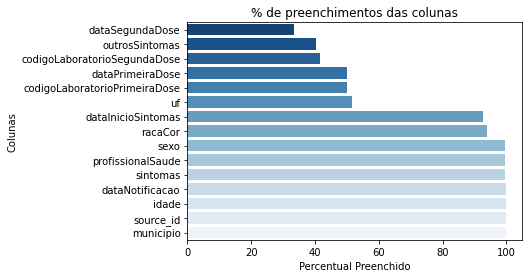

In [274]:
sns.barplot(data=percentual_preechimento_colunas, x='Percentual Preenchido', y='Colunas', orient='h', palette='Blues_r',).set_title("% de preenchimentos das colunas")

## Padronização e Consistência

Considerando a regra de negócio de cada coluna, faremos as padronizações e analisaremos a consistência dos dados.

* source_id: Este é o campo de identificação de um registro, sendo assim, não deve haver duplicidades e nenhum tipo de tratamento neste campo. 

In [275]:
indicadores_covid.source_id.head()

0    rM2yS1KeSg
1    KuQV22ighx
2    reZML6hwMz
3    fJjnOzDbg6
4    zzq5HVGd17
Name: source_id, dtype: object

In [276]:
len(indicadores_covid.source_id)-len(indicadores_covid.source_id.drop_duplicates())

10

In [277]:
indicadores_covid = indicadores_covid.drop_duplicates(subset=['source_id']) 

In [278]:
indicadores_covid.count()

source_id                        10489
dataNotificacao                  10480
dataInicioSintomas                9733
sintomas                         10457
profissionalSaude                10448
racaCor                           9858
outrosSintomas                    4213
sexo                             10447
uf                                5411
municipio                        10489
dataPrimeiraDose                  5246
dataSegundaDose                   3511
codigoLaboratorioPrimeiraDose     5251
codigoLaboratorioSegundaDose      4374
idade                            10485
dtype: int64

* dataNotificacao: Deve ser maior que 04/01/2020 e menor do que 22/07/2022 e Possui a formatação AAAA-MM-DD 

In [279]:
indicadores_covid.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
0,rM2yS1KeSg,2022-02-15,2022-02-09,"Tosse, Febre",Não,Parda,NaN,Feminino,SP,Barretos,2020-03-23,NaN,JANSSEN,NaN,45.0
1,KuQV22ighx,1900-01-01,2020-07-08,"Tosse, Dor de Garganta",Não,Parda,NaN,Feminino,NaN,Pilar,NaN,NaN,NaN,NaN,27.0
2,reZML6hwMz,2022-06-21,2022-05-27,"Tosse, Febre, Dor de Garganta, Outros",Não,Branca,MIALGIA,Feminino,SP,São Paulo,2026-01-05,2020-08-26,ASTRAZENECA/FIOCRUZ,ASTRAZENECA/FIOCRUZ,32.0
3,fJjnOzDbg6,1900-01-01,2020-07-22,"Dispneia, Outros",Não,Parda,CEFALEIA,Masculino,NaN,Pilar,NaN,NaN,NaN,NaN,26.0
4,zzq5HVGd17,2022-03-22,NaN,Assintomático,Sim,Branca,NaN,Masculino,SP,São Paulo,2026-01-05,NaN,ASTRAZENECA/FIOCRUZ,NaN,37.0


In [280]:
indicadores_covid.dataNotificacao.drop_duplicates().sort_values()

1       1900-01-01
1362    2020-01-04
667     2020-01-05
669     2020-01-06
671     2020-01-28
           ...    
2752    2022-07-11
1638    2022-07-12
6268    2022-07-13
198     2022-07-14
649            NaN
Name: dataNotificacao, Length: 600, dtype: object

In [281]:
data_notificacao_correta = indicadores_covid[(indicadores_covid.dataNotificacao >= '2020-01-04') &
                                             (indicadores_covid.dataNotificacao <= '2022-07-22')]

In [282]:
print("Apenas", len(indicadores_covid) - len(data_notificacao_correta), "linhas contém dados fora da data correta, neste caso a melhor opção é deleta-los")

Apenas 18 linhas contém dados fora da data correta, neste caso a melhor opção é deleta-los


In [283]:
validando_datas_fora_padrao = indicadores_covid[~indicadores_covid.dataNotificacao.isin(data_notificacao_correta.dataNotificacao)]

Os valores restantes correspondem a valores nulos e uma data inválida, isso é mais um motivo para remover estes registros.

In [284]:
validando_datas_fora_padrao.dataNotificacao.drop_duplicates()

1      1900-01-01
649           NaN
Name: dataNotificacao, dtype: object

In [285]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[(indicadores_covid.dataNotificacao < '2020-01-04') |
                                          (indicadores_covid.dataNotificacao > '2022-07-22') |
                                          (pd.isna(indicadores_covid.dataNotificacao))].index)

In [286]:
indicadores_covid.count()

source_id                        10471
dataNotificacao                  10471
dataInicioSintomas                9715
sintomas                         10439
profissionalSaude                10430
racaCor                           9841
outrosSintomas                    4207
sexo                             10429
uf                                5403
municipio                        10471
dataPrimeiraDose                  5245
dataSegundaDose                   3511
codigoLaboratorioPrimeiraDose     5250
codigoLaboratorioSegundaDose      4374
idade                            10467
dtype: int64

* dataInicioSintomas: Deve ser maior que 04/01/2020 e menor do que 22/07/2022 e Possui a formatação AAAA-MM-DD 

In [287]:
indicadores_covid.dataInicioSintomas.drop_duplicates().sort_values()

10156    1977-09-24
1362     2020-01-04
667      2020-01-05
935      2020-01-06
3222     2020-01-31
            ...    
656      2022-07-11
6512     2022-07-12
198      2022-07-14
4535     2023-09-10
4               NaN
Name: dataInicioSintomas, Length: 663, dtype: object

In [288]:
data_inicio_sintomas_correta = indicadores_covid[(indicadores_covid.dataInicioSintomas >= '2020-01-04') &
                                                  (indicadores_covid.dataInicioSintomas <= '2022-07-22')]

Faz sentido que pacientes assintomáticos não tenham uma data de início de sintomas, então precisamos colocar mais essa regra no filtro. Além disso, precisamos desconsiderar as datas 2023-09-10 e 1977-09-24, pois, não fazem parte do período da covid.

In [289]:
validacao_data_inicio_sintomas = indicadores_covid[~indicadores_covid.dataInicioSintomas.isin(data_inicio_sintomas_correta.dataInicioSintomas)]
validacao_data_inicio_sintomas[['dataInicioSintomas', 'sintomas']].drop_duplicates()

,dataInicioSintomas,sintomas
4,NaN,Assintomático
4535,2023-09-10,NaN
4625,2023-09-10,"Tosse,Dispneia"
4631,2023-09-10,Tosse
4635,2023-09-10,"Febre,Tosse,Dor de Garganta"
4707,2023-09-10,Dor de Garganta
4733,2023-09-10,"Febre,Dispneia"
4735,2023-09-10,Dispneia
4837,2023-09-10,"Tosse,Dor de Garganta"
10156,1977-09-24,Dispneia


Validando a quantidade de linhas com a data incorreta antes de deletar.

In [290]:
indicadores_covid[(indicadores_covid.dataInicioSintomas == '2023-09-10') |
                  (indicadores_covid.dataInicioSintomas == '1977-09-24')].count()

source_id                        42
dataNotificacao                  42
dataInicioSintomas               42
sintomas                         10
profissionalSaude                 1
racaCor                           1
outrosSintomas                    0
sexo                             42
uf                                1
municipio                        42
dataPrimeiraDose                  1
dataSegundaDose                   0
codigoLaboratorioPrimeiraDose     1
codigoLaboratorioSegundaDose      0
idade                            42
dtype: int64

In [291]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[(indicadores_covid.dataInicioSintomas == '2023-09-10') |
                                                             (indicadores_covid.dataInicioSintomas == '1977-09-24')].index)

Mesmo com a ultima correção, ainda precisamos trocar as data de inicio de sintomas dos pacientes assintomaticos por um valor nulo.

In [292]:
indicadores_covid[['dataInicioSintomas', 'sintomas']].drop_duplicates().sort_values(by='sintomas')

,dataInicioSintomas,sintomas
389,2021-01-22,Assintomático
587,2020-10-23,Assintomático
61,2020-11-26,Assintomático
63,2020-12-09,Assintomático
433,2021-07-05,Assintomático
...,...,...
6673,2020-06-29,"Tosse, Outros, Febre"
267,2020-08-19,"Tosse, Outros, Febre"
6705,2020-06-29,"Tosse, Outros, Febre, Dor de Garganta"
697,2020-03-21,"Tosse,Dor de Garganta"


In [293]:
indicadores_covid.loc[indicadores_covid.sintomas == 'Assintomático', 'dataInicioSintomas'] = np.nan

In [294]:
indicadores_covid[['dataInicioSintomas', 'sintomas']].drop_duplicates().sort_values(by='sintomas')

,dataInicioSintomas,sintomas
4,NaN,Assintomático
6306,2021-12-06,Coriza
136,2022-01-04,Coriza
425,2021-06-13,Coriza
3606,2022-01-22,Coriza
...,...,...
6673,2020-06-29,"Tosse, Outros, Febre"
1100,2021-12-28,"Tosse, Outros, Febre"
6705,2020-06-29,"Tosse, Outros, Febre, Dor de Garganta"
697,2020-03-21,"Tosse,Dor de Garganta"


In [295]:
validacao_data_inicio_sintomas_v2 = indicadores_covid[(indicadores_covid.dataInicioSintomas < '2020-01-04') |
                                                      (indicadores_covid.dataInicioSintomas > '2022-07-22') |
                                                      (pd.isna(indicadores_covid.dataInicioSintomas))]

Ao filtrar fora do intervalo, os únicos valores que aparecem são de datas de inicio dos sintomas nulos e na coluna de sintomas está sinalizado "assintomatico". O que significa que a correção foi feita.

In [296]:
validacao_data_inicio_sintomas_v2[['dataInicioSintomas','sintomas']].drop_duplicates()

,dataInicioSintomas,sintomas
4,NaN,Assintomático


In [297]:
print("Removendo 42 linhas de 10.481 passamos a ter 10.439")

indicadores_covid.count()

Removendo 42 linhas de 10.481 passamos a ter 10.439


source_id                        10429
dataNotificacao                  10429
dataInicioSintomas                9604
sintomas                         10429
profissionalSaude                10429
racaCor                           9840
outrosSintomas                    4207
sexo                             10387
uf                                5402
municipio                        10429
dataPrimeiraDose                  5244
dataSegundaDose                   3511
codigoLaboratorioPrimeiraDose     5249
codigoLaboratorioSegundaDose      4374
idade                            10425
dtype: int64

* sintomas: Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas

In [298]:
indicadores_covid.sintomas.drop_duplicates()

0                                             Tosse, Febre
2                    Tosse, Febre, Dor de Garganta, Outros
4                                            Assintomático
6                      Dor de Cabeça, Tosse, Febre, Coriza
8                  Tosse, Dispneia, Dor de Garganta, Febre
                               ...                        
10320        Coriza, Dor de Garganta, Distúrbios Olfativos
10364                  Tosse, Outros, Distúrbios Olfativos
10415      Febre, Dor de Garganta, Dispneia, Outros, Tosse
10446                       Dor de Garganta, Tosse, Coriza
10490    Coriza, Distúrbios Olfativos, Tosse, Distúrbio...
Name: sintomas, Length: 662, dtype: object

Removendo caracteres especiais da coluna de sintomas.

In [299]:
indicadores_covid.sintomas = indicadores_covid.sintomas.apply(lambda x: unidecode(x))
indicadores_covid.sintomas.drop_duplicates()

0                                             Tosse, Febre
2                    Tosse, Febre, Dor de Garganta, Outros
4                                            Assintomatico
6                      Dor de Cabeca, Tosse, Febre, Coriza
8                  Tosse, Dispneia, Dor de Garganta, Febre
                               ...                        
10320        Coriza, Dor de Garganta, Disturbios Olfativos
10364                  Tosse, Outros, Disturbios Olfativos
10415      Febre, Dor de Garganta, Dispneia, Outros, Tosse
10446                       Dor de Garganta, Tosse, Coriza
10490    Coriza, Disturbios Olfativos, Tosse, Disturbio...
Name: sintomas, Length: 662, dtype: object

Colocando os sintomas com letras maiúsculas.

In [300]:
indicadores_covid.sintomas = indicadores_covid.sintomas.apply(lambda x: x.upper())
indicadores_covid.sintomas.drop_duplicates()

0                                             TOSSE, FEBRE
2                    TOSSE, FEBRE, DOR DE GARGANTA, OUTROS
4                                            ASSINTOMATICO
6                      DOR DE CABECA, TOSSE, FEBRE, CORIZA
8                  TOSSE, DISPNEIA, DOR DE GARGANTA, FEBRE
                               ...                        
10320        CORIZA, DOR DE GARGANTA, DISTURBIOS OLFATIVOS
10364                  TOSSE, OUTROS, DISTURBIOS OLFATIVOS
10415      FEBRE, DOR DE GARGANTA, DISPNEIA, OUTROS, TOSSE
10446                       DOR DE GARGANTA, TOSSE, CORIZA
10490    CORIZA, DISTURBIOS OLFATIVOS, TOSSE, DISTURBIO...
Name: sintomas, Length: 662, dtype: object

In [301]:
lista_sintomas = indicadores_covid.sintomas.apply(lambda x: x.replace(", ", ","))
lista_sintomas

0                                 TOSSE,FEBRE
2          TOSSE,FEBRE,DOR DE GARGANTA,OUTROS
4                               ASSINTOMATICO
6            DOR DE CABECA,TOSSE,FEBRE,CORIZA
8        TOSSE,DISPNEIA,DOR DE GARGANTA,FEBRE
                         ...                 
10493                             FEBRE,TOSSE
10494    CORIZA,DOR DE CABECA,DOR DE GARGANTA
10495                          FEBRE,DISPNEIA
10496                                   FEBRE
10498                    DISTURBIOS OLFATIVOS
Name: sintomas, Length: 10429, dtype: object

In [302]:
lista_sintomas_v2 = lista_sintomas.apply(lambda x: x.split(','))
lista_sintomas_v2

0                                   [TOSSE, FEBRE]
2          [TOSSE, FEBRE, DOR DE GARGANTA, OUTROS]
4                                  [ASSINTOMATICO]
6            [DOR DE CABECA, TOSSE, FEBRE, CORIZA]
8        [TOSSE, DISPNEIA, DOR DE GARGANTA, FEBRE]
                           ...                    
10493                               [FEBRE, TOSSE]
10494     [CORIZA, DOR DE CABECA, DOR DE GARGANTA]
10495                            [FEBRE, DISPNEIA]
10496                                      [FEBRE]
10498                       [DISTURBIOS OLFATIVOS]
Name: sintomas, Length: 10429, dtype: object

In [303]:
lista_sintomas_v3 = list(chain.from_iterable(lista_sintomas_v2))
lista_sintomas_v3

['TOSSE',
 'FEBRE',
 'TOSSE',
 'FEBRE',
 'DOR DE GARGANTA',
 'OUTROS',
 'ASSINTOMATICO',
 'DOR DE CABECA',
 'TOSSE',
 'FEBRE',
 'CORIZA',
 'TOSSE',
 'DISPNEIA',
 'DOR DE GARGANTA',
 'FEBRE',
 'TOSSE',
 'DOR DE GARGANTA',
 'CORIZA',
 'DOR DE CABECA',
 'TOSSE',
 'FEBRE',
 'DOR DE GARGANTA',
 'OUTROS',
 'CORIZA',
 'TOSSE',
 'DOR DE GARGANTA',
 'ASSINTOMATICO',
 'DOR DE CABECA',
 'DOR DE GARGANTA',
 'OUTROS',
 'TOSSE',
 'DOR DE GARGANTA',
 'OUTROS',
 'DOR DE CABECA',
 'OUTROS',
 'DISPNEIA',
 'FEBRE',
 'CORIZA',
 'OUTROS',
 'CORIZA',
 'TOSSE',
 'FEBRE',
 'OUTROS',
 'DISTURBIOS OLFATIVOS',
 'TOSSE',
 'DOR DE GARGANTA',
 'CORIZA',
 'DOR DE GARGANTA',
 'TOSSE',
 'OUTROS',
 'ASSINTOMATICO',
 'DOR DE GARGANTA',
 'TOSSE',
 'DISTURBIOS OLFATIVOS',
 'DISTURBIOS GUSTATIVOS',
 'CORIZA',
 'TOSSE',
 'FEBRE',
 'TOSSE',
 'DOR DE GARGANTA',
 'DISTURBIOS GUSTATIVOS',
 'CORIZA',
 'CORIZA',
 'TOSSE',
 'ASSINTOMATICO',
 'ASSINTOMATICO',
 'DOR DE GARGANTA',
 'ASSINTOMATICO',
 'DOR DE CABECA',
 'TOSSE',
 'ASSIN

Não existem sintomas escritos de maneira erronea ou números, então a coluna está correta.

In [304]:
pd.Series(lista_sintomas_v3).unique()

array(['TOSSE', 'FEBRE', 'DOR DE GARGANTA', 'OUTROS', 'ASSINTOMATICO',
       'DOR DE CABECA', 'CORIZA', 'DISPNEIA', 'DISTURBIOS OLFATIVOS',
       'DISTURBIOS GUSTATIVOS'], dtype=object)

* profissionalSaude

● Aceita somente SIM ou NAO 

● Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas 

In [305]:
indicadores_covid.profissionalSaude.drop_duplicates()

0    Não
4    Sim
Name: profissionalSaude, dtype: object

Tirando acentuação da coluna "Profissional Saude".

In [306]:
indicadores_covid.profissionalSaude = indicadores_covid.profissionalSaude.apply(lambda x: unidecode(x))
indicadores_covid.profissionalSaude.drop_duplicates()

0    Nao
4    Sim
Name: profissionalSaude, dtype: object

Colocando os dados da coluna "Profissional Saude" como maiúsculo.

In [307]:
indicadores_covid.profissionalSaude = indicadores_covid.profissionalSaude.apply(lambda x: x.upper())
indicadores_covid.profissionalSaude.drop_duplicates()

0    NAO
4    SIM
Name: profissionalSaude, dtype: object

* racaCor 

● Aceita AMARELA, BRANCA, IGNORADO, INDIGENA, PARDA, PRETA 

● Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas. 

Como não foram encontradas categorias com caracteres especiais e acentuação, não será preciso fazer esta alteração.

In [308]:
indicadores_covid.racaCor.drop_duplicates()

0         Parda
2        Branca
10      Amarela
14        Preta
16     Ignorado
19          NaN
549    Indigena
Name: racaCor, dtype: object

In [309]:
quantidade_registros_racacor = indicadores_covid.groupby('racaCor').count().reset_index()
quantidade_registros_racacor[['racaCor','source_id']]

,racaCor,source_id
0,Amarela,385
1,Branca,5375
2,Ignorado,1558
3,Indigena,14
4,Parda,2109
5,Preta,399


Temos 10.439 registros de raça e cor dos pacientes, sendo 9.850 preenchidos e 589 nulos.

In [310]:
indicadores_covid.racaCor.count()

9840

In [311]:
indicadores_covid.racaCor.isnull().sum()

589

Onde localizamos o valor nulo na coluna de raça e cor, o melhor a fazer será preenche-la como "Ignorado".

In [312]:
indicadores_covid.loc[pd.isna(indicadores_covid.racaCor), 'racaCor'] = 'Ignorado'

Transformando as categorias de raça e cor em maiúsculo.

In [313]:
indicadores_covid.racaCor = indicadores_covid.racaCor.apply(lambda x: x.upper())

In [314]:
indicadores_covid.racaCor.drop_duplicates()

0         PARDA
2        BRANCA
10      AMARELA
14        PRETA
16     IGNORADO
549    INDIGENA
Name: racaCor, dtype: object

* outrosSintomas: Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas

In [315]:
indicadores_covid.outrosSintomas.drop_duplicates().sort_values()

1580                                              *
3749                                              -
3289                                     12/05/2020
4663                                     15/06/2020
7439                             A PEDIDO DO MEDICO
                           ...                     
9755                                vomito diarreia
6691          vomitos incoerciveis , dor abdominal.
1834    vomitos, dor corpo , fadiga, dor abdominal,
8449                                         vômito
0                                               NaN
Name: outrosSintomas, Length: 2033, dtype: object

Usando Regex para remover datas/números e caracteres especiais.

In [316]:
indicadores_covid.outrosSintomas = indicadores_covid.outrosSintomas.str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [317]:
indicadores_covid.outrosSintomas.drop_duplicates().sort_values()

1580                                              *
3749                                              -
3289                                             //
7439                             A PEDIDO DO MEDICO
1672                               ADIMANIA/MIALGIA
                           ...                     
9755                                vomito diarreia
6691          vomitos incoerciveis , dor abdominal.
1834    vomitos, dor corpo , fadiga, dor abdominal,
8449                                         vômito
0                                               NaN
Name: outrosSintomas, Length: 2032, dtype: object

Como alguns sintomas estão separados por barra, precisamos primeiro substituir a barra por espaço, dessa forma, quando removermos caracteres especiais, não concatenamos duas palavras diferentes.

In [318]:
indicadores_covid.outrosSintomas = indicadores_covid.outrosSintomas.str.replace('/', ' ')

In [319]:
indicadores_covid.outrosSintomas = indicadores_covid.outrosSintomas.str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [320]:
indicadores_covid.outrosSintomas.drop_duplicates().sort_values()

1580                                           
3289                                           
7439                         A PEDIDO DO MEDICO
1672                           ADIMANIA MIALGIA
110                                    ADINAMIA
                         ...                   
9755                            vomito diarreia
1834    vomitos dor corpo  fadiga dor abdominal
6691        vomitos incoerciveis  dor abdominal
8449                                     vômito
0                                           NaN
Name: outrosSintomas, Length: 1956, dtype: object

Como já existe uma coluna com sintomas, a coluna "outrosSintomas" não precisa ser preenchida obrigatóriamente. Neste caso, valores nulos permanecerão sem preenchimento.

In [321]:
indicadores_covid.outrosSintomas.isnull().sum()

6222

Removendo a acentuação.

In [322]:
indicadores_covid.outrosSintomas = indicadores_covid.loc[~pd.isna(indicadores_covid.outrosSintomas), 'outrosSintomas'].apply(lambda x: unidecode(x))
indicadores_covid.outrosSintomas.drop_duplicates()

0                                        NaN
2                                    MIALGIA
14                            MIALGIA FADIGA
18                            DOR NAS COSTAS
21                                        NI
                        ...                 
10457                       ansomia diarreia
10469    dor de cabeca diarreia dor no corpo
10477    diarreia mialgia e dor retroorbital
10481              CEFALEIA EDEMA PELO CORPO
10491                      CORIZA E ESPIRROS
Name: outrosSintomas, Length: 1892, dtype: object

Transformando em maiúsculo.

In [323]:
indicadores_covid.outrosSintomas = indicadores_covid.loc[~pd.isna(indicadores_covid.outrosSintomas), 'outrosSintomas'].apply(lambda x: x.upper())
indicadores_covid.outrosSintomas.drop_duplicates()

0                                        NaN
2                                    MIALGIA
14                            MIALGIA FADIGA
18                            DOR NAS COSTAS
21                                        NI
                        ...                 
10457                       ANSOMIA DIARREIA
10469    DOR DE CABECA DIARREIA DOR NO CORPO
10477    DIARREIA MIALGIA E DOR RETROORBITAL
10481              CEFALEIA EDEMA PELO CORPO
10491                      CORIZA E ESPIRROS
Name: outrosSintomas, Length: 1704, dtype: object

Validando se existem números e/ou caracteres especiais na coluna.

In [324]:
validacao_outros_sintomas = indicadores_covid.loc[~pd.isna(indicadores_covid.outrosSintomas)]

In [325]:
validacao_outros_sintomas_v2 = validacao_outros_sintomas[validacao_outros_sintomas.outrosSintomas.str.contains('\d+')]
validacao_outros_sintomas_v2

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
339,cjfSlj19uV,2020-09-23,2020-09-18,"DISPNEIA, OUTROS",NAO,AMARELA,DESCONFORTO RESPIRATORIO SATURACAO O2 INAPITEN...,Feminino,NaN,Betim,NaN,NaN,NaN,NaN,81.0
341,LTqO3AvNgu,2020-09-23,2020-09-18,"DISPNEIA, OUTROS",NAO,AMARELA,DESCONFORTO RESPIRATORIO SATURACAO O2INAPITENC...,F,NaN,Betim,NaN,NaN,NaN,NaN,81.0
1371,0jjklA2EER,2020-04-18,2020-04-18,"DISPNEIA, OUTROS",NAO,IGNORADO,SPO2,Feminino,NaN,São Bernardo do Campo,NaN,NaN,NaN,NaN,84.0


Na coluna não existem mais caracteres especiais e números.

In [326]:
valida_numeros_outros_sintomas_v3 = validacao_outros_sintomas_v2[validacao_outros_sintomas_v2.outrosSintomas.str.contains('\d+')]
valida_numeros_outros_sintomas_v3

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
339,cjfSlj19uV,2020-09-23,2020-09-18,"DISPNEIA, OUTROS",NAO,AMARELA,DESCONFORTO RESPIRATORIO SATURACAO O2 INAPITEN...,Feminino,NaN,Betim,NaN,NaN,NaN,NaN,81.0
341,LTqO3AvNgu,2020-09-23,2020-09-18,"DISPNEIA, OUTROS",NAO,AMARELA,DESCONFORTO RESPIRATORIO SATURACAO O2INAPITENC...,F,NaN,Betim,NaN,NaN,NaN,NaN,81.0
1371,0jjklA2EER,2020-04-18,2020-04-18,"DISPNEIA, OUTROS",NAO,IGNORADO,SPO2,Feminino,NaN,São Bernardo do Campo,NaN,NaN,NaN,NaN,84.0


In [327]:
validacao_outros_sintomas[validacao_outros_sintomas.outrosSintomas.str.contains('[^\w\s]')]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade


* Sexo 

● Aceita MASCULINO, FEMININO E INDEFINIDO 

● Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas 

In [328]:
indicadores_covid.sexo.drop_duplicates()

0         Feminino
4        Masculino
8               M 
100             F 
625         Mulher
3742           NaN
9033    Indefinido
Name: sexo, dtype: object

In [329]:
indicadores_covid.sexo[8]

'M '

In [330]:
indicadores_covid.sexo[100]

'F '

In [331]:
indicadores_covid.sexo = indicadores_covid.sexo.replace('M ', 'MASCULINO').replace('F ', 'FEMININO').replace('Mulher', 'FEMININO').replace(np.nan, 'INDEFINIDO')
indicadores_covid.sexo.drop_duplicates()

0         Feminino
4        Masculino
8        MASCULINO
100       FEMININO
3742    INDEFINIDO
9033    Indefinido
Name: sexo, dtype: object

Como a coluna não valores numéricos e caracteres especiais, só precisamos colocar tudo em maiúsculo.

In [332]:
indicadores_covid.sexo = indicadores_covid.sexo.apply(lambda x: x.upper())
indicadores_covid.sexo.drop_duplicates()

0         FEMININO
4        MASCULINO
3742    INDEFINIDO
Name: sexo, dtype: object

* UF 

● Aceita somente UFs válidas de acordo com o padrão IBGE 

● Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas 

Como as siglas já estão com letras maiúsculas e não contém caracteres especiais, o único tratamento necessário é de preencher os estados nulos.

In [333]:
indicadores_covid.uf.drop_duplicates()

0        SP
17       AP
19      NaN
69       BA
88       PI
111      CE
127      DF
141      ES
207      GO
226      PA
262      PE
264      SC
275      MA
281      MT
289      MS
343      MG
503      PR
561      RS
603      RJ
1054     AM
1056     RN
1278     PB
2932     RO
3538     SE
7782     RR
Name: uf, dtype: object

In [334]:
indicadores_covid.uf.isnull().sum()

5027

Usando um de_para das colunas que tem o estado e municipio preenchidos, vamos preencher valores nulos com base no município.

In [335]:
indicadores_covid[pd.isna(indicadores_covid.uf)]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
19,OjCehDaywP,2020-03-27,2020-03-19,TOSSE,NAO,IGNORADO,NaN,FEMININO,NaN,Salvador,NaN,NaN,NaN,NaN,47.0
21,nSy3G8HDrb,2020-05-19,2020-05-07,OUTROS,NAO,PARDA,NI,MASCULINO,NaN,Salvador,NaN,NaN,NaN,NaN,34.0
23,E2erY1iyRF,2020-06-23,2020-06-17,"DISPNEIA, FEBRE",NAO,AMARELA,NaN,MASCULINO,NaN,Tapiramutá,NaN,NaN,NaN,NaN,23.0
25,oHBjcM65QN,2020-07-20,2020-07-11,OUTROS,NAO,BRANCA,SEM SINTOMAS,FEMININO,NaN,Salvador,NaN,NaN,NaN,NaN,36.0
27,ECH0NpGyXp,2020-08-21,2020-08-17,OUTROS,NAO,AMARELA,CEFALEIA MIALGIA,MASCULINO,NaN,Tapiramutá,NaN,NaN,NaN,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,Wz8c8VoTde,2020-08-03,2020-08-03,OUTROS,NAO,BRANCA,CONTACTANTE,FEMININO,NaN,Barretos,NaN,NaN,NaN,NaN,17.0
10489,gxOsHslRjA,2020-08-03,2020-08-02,"TOSSE, FEBRE",NAO,PRETA,NaN,MASCULINO,NaN,Barretos,NaN,NaN,NaN,NaN,30.0
10491,YNhv90zVxv,2020-08-03,2020-08-02,"TOSSE, OUTROS",NAO,BRANCA,CORIZA E ESPIRROS,MASCULINO,NaN,Barretos,NaN,NaN,NaN,NaN,2.0
10493,8uwoUJSnLI,2020-08-03,2020-07-23,"FEBRE, TOSSE",NAO,BRANCA,NaN,MASCULINO,NaN,Cajuru,NaN,NaN,NaN,NaN,51.0


In [336]:
base_de_para_estado = indicadores_covid[~pd.isna(indicadores_covid.uf)]
base_de_para_estado_v2 = base_de_para_estado[['uf','municipio']].drop_duplicates()
base_de_para_estado_v2

,uf,municipio
0,SP,Barretos
2,SP,São Paulo
10,SP,Campinas
16,SP,Paulínia
17,AP,Amapá
...,...,...
10444,SP,Tarabai
10466,SP,Rafard
10468,SP,Rancharia
10478,SP,Ribeirão Bonito


In [337]:
for index, row in base_de_para_estado_v2.iterrows():
  indicadores_covid.loc[indicadores_covid["municipio"] == row['municipio'] , 'uf'] = row['uf']

In [338]:
indicadores_covid.uf.drop_duplicates()

0        SP
17       AP
19       BA
23      NaN
88       PI
97       CE
117      DF
139      ES
143      GO
226      PA
262      PE
264      SC
275      MA
281      MT
289      MS
311      MG
503      PR
505      PB
561      RS
569      RJ
1054     AM
1056     RN
2932     RO
3538     SE
7782     RR
Name: uf, dtype: object

De 5033 nulos, agora temos apenas 199.

Como as 199 linhas que restaram não tem referência de Estado, e na coluna não podemos ter valores nulos, os mesmos serão removidos.

In [339]:
indicadores_covid.uf.isnull().sum()

198

In [340]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[pd.isna(indicadores_covid.uf)].index)

In [341]:
indicadores_covid[pd.isna(indicadores_covid.uf)]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade


* Municipio: Não deve possuir números, caracteres especiais, acentuação e deve ser formatado em letras maiúsculas 

In [342]:
indicadores_covid.municipio.drop_duplicates().sort_values()

2026                Adamantina
3909                     Aguaí
514                   Alambari
4298         Alfredo Marcondes
2038                    Altair
                 ...          
6836    Águas de Santa Bárbara
6838        Águas de São Pedro
6515          Álvares Florence
1351           Álvares Machado
6860        Álvaro de Carvalho
Name: municipio, Length: 525, dtype: object

In [343]:
indicadores_covid.municipio = indicadores_covid.municipio.apply(lambda x: unidecode(x))
indicadores_covid.municipio.drop_duplicates()

0                   Barretos
2                  Sao Paulo
10                  Campinas
16                  Paulinia
17                     Amapa
                ...         
10444                Tarabai
10466                 Rafard
10468              Rancharia
10478        Ribeirao Bonito
10484    Ribeirao dos Indios
Name: municipio, Length: 525, dtype: object

In [344]:
indicadores_covid.municipio = indicadores_covid.municipio.apply(lambda x: x.upper())
indicadores_covid.municipio.drop_duplicates()

0                   BARRETOS
2                  SAO PAULO
10                  CAMPINAS
16                  PAULINIA
17                     AMAPA
                ...         
10444                TARABAI
10466                 RAFARD
10468              RANCHARIA
10478        RIBEIRAO BONITO
10484    RIBEIRAO DOS INDIOS
Name: municipio, Length: 525, dtype: object

Não contém caracteres númericos.

In [345]:
indicadores_covid[indicadores_covid.municipio.str.contains('\d+')]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade


Como a coluna contém caracteres especiais, é preciso remove-los.

In [346]:
indicadores_covid[indicadores_covid.municipio.str.contains('[^\w\s]')]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
204,xZQpcIalAH,2022-06-15,2022-06-12,OUTROS,NAO,IGNORADO,CONTATO COM COVID,FEMININO,SP,EMBU-GUACU,2021-01-19,NaN,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,39.0
449,oVd4OxuD1Q,2021-08-17,2021-08-16,"TOSSE, OUTROS, DOR DE CABECA, DISTURBIOS GUSTA...",NAO,BRANCA,NAUSEA MIALGIA,FEMININO,MG,SAPUCAI-MIRIM,NaN,NaN,NaN,NaN,43.0
516,zWbGVgfRCg,2022-04-13,2022-04-11,"CORIZA, DOR DE GARGANTA, OUTROS",NAO,BRANCA,CANSACO,FEMININO,SP,SANTA BARBARA D'OESTE,2021-01-20,2021-02-10,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,23.0
2048,5aIN4WnDl3,2022-06-29,NaN,ASSINTOMATICO,NAO,IGNORADO,NaN,FEMININO,SP,SANTA BARBARA D'OESTE,2021-01-21,2021-02-17,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,32.0
2057,R5YlxPfCXV,2020-05-03,2020-04-06,"DOR DE GARGANTA, TOSSE",SIM,BRANCA,NaN,FEMININO,SP,PARIQUERA-ACU,NaN,NaN,NaN,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,JVng4Dt2v0,2022-01-28,2022-01-09,"DOR DE GARGANTA, DOR DE CABECA",SIM,PARDA,NaN,FEMININO,SP,PARIQUERA-ACU,2021-01-22,NaN,SINOVAC/BUTANTAN,PFIZER,29.0
10028,rOdiib7A5f,2022-06-02,2022-05-02,"CORIZA, DOR DE CABECA, DOR DE GARGANTA",SIM,BRANCA,NaN,FEMININO,SP,PARIQUERA-ACU,2021-01-22,2021-02-19,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,51.0
10030,9AjpqfW0Pq,2022-05-24,2022-05-22,"CORIZA, DOR DE CABECA, TOSSE, DOR DE GARGANTA",SIM,BRANCA,NaN,MASCULINO,SP,PARIQUERA-ACU,2021-01-22,2021-02-10,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,62.0
10133,LSySO93llF,2020-08-01,2020-07-25,"OUTROS, FEBRE",NAO,AMARELA,DOR NO CORPO E CABECA,MASCULINO,SP,SANTA CLARA D'OESTE,NaN,NaN,NaN,NaN,35.0


In [347]:
indicadores_covid.municipio = indicadores_covid.municipio.str.replace('[^\w\s]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Validando se na coluna ainda constam caracteres numericos.

In [348]:
indicadores_covid[indicadores_covid.municipio.str.contains('[^\w\s]')]

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade


* dataPrimeiraDose

● Deve ser maior que 23/03/2020 e menor do que 22/07/2022 

● Possui a formatação AAAA-MM-DD 

● Deve ser menor do que a ‘dataSegundaDose’ 

Como as datas da primeira dose está entre o intervalo de tempo maior que 23/03/2020 e menor do que 22/07/2022, essa validação não será necessária.

In [349]:
indicadores_covid.dataPrimeiraDose.drop_duplicates().sort_values()

0       2020-03-23
10      2020-08-13
14      2020-08-20
16      2020-08-27
18      2020-08-28
24      2020-08-31
26      2020-09-03
28      2020-09-04
30      2020-09-07
32      2020-09-08
34      2020-09-10
36      2020-09-11
40      2020-09-17
46      2020-10-01
48      2020-10-08
50      2020-10-14
52      2020-10-15
54      2020-10-24
60      2020-10-29
62      2020-12-09
66      2021-01-17
72      2021-01-18
124     2021-01-19
492     2021-01-20
1946    2021-01-21
3581    2021-01-22
2       2026-01-05
17             NaN
Name: dataPrimeiraDose, dtype: object

In [350]:
indicadores_covid.dataSegundaDose.drop_duplicates().sort_values()

8       2020-08-19
2       2020-08-26
10      2020-08-27
6       2020-08-29
14      2020-09-03
           ...    
2962    2021-12-04
3536    2021-12-06
5660    2022-01-18
9494    2022-02-10
0              NaN
Name: dataSegundaDose, Length: 125, dtype: object

Como precisamos fazer a comparação entre datas, é preciso olhar somente para as datas preenchidas.

In [351]:
validacao_primeira_dose = indicadores_covid[~pd.isna(indicadores_covid.dataPrimeiraDose) & ~pd.isna(indicadores_covid.dataSegundaDose)]
validacao_primeira_dose.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
2,reZML6hwMz,2022-06-21,2022-05-27,"TOSSE, FEBRE, DOR DE GARGANTA, OUTROS",NAO,BRANCA,MIALGIA,FEMININO,SP,SAO PAULO,2026-01-05,2020-08-26,ASTRAZENECA/FIOCRUZ,ASTRAZENECA/FIOCRUZ,32.0
6,HH83StMnCa,2022-06-01,2022-05-15,"DOR DE CABECA, TOSSE, FEBRE, CORIZA",SIM,BRANCA,NaN,MASCULINO,SP,SAO PAULO,2026-01-05,2020-08-29,ASTRAZENECA/FIOCRUZ,ASTRAZENECA/FIOCRUZ,55.0
8,Sj0FZQNKVX,2022-01-06,2022-01-04,"TOSSE, DISPNEIA, DOR DE GARGANTA, FEBRE",NAO,BRANCA,NaN,MASCULINO,SP,SAO PAULO,2026-01-05,2020-08-19,ASTRAZENECA/FIOCRUZ,ASTRAZENECA/FIOCRUZ,34.0
10,3yV4tVE18W,2022-06-15,2022-06-13,"TOSSE, DOR DE GARGANTA",NAO,AMARELA,NaN,FEMININO,SP,CAMPINAS,2020-08-13,2020-08-27,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
14,NVTIBCtHvf,2022-07-07,2022-07-05,"CORIZA, DOR DE CABECA, TOSSE, FEBRE, DOR DE GA...",SIM,PRETA,MIALGIA FADIGA,FEMININO,SP,SAO PAULO,2020-08-20,2020-09-03,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,45.0


In [352]:
linhas_erradas = []

for index, row in validacao_primeira_dose.iterrows():
  if row['dataPrimeiraDose'] > row['dataSegundaDose']:
    print("numero da linha:",index,", primeira dose:",row['dataPrimeiraDose'], ", segunda dose:",row['dataSegundaDose'])
    linhas_erradas.append(index)

numero da linha: 2 , primeira dose: 2026-01-05 , segunda dose: 2020-08-26
numero da linha: 6 , primeira dose: 2026-01-05 , segunda dose: 2020-08-29
numero da linha: 8 , primeira dose: 2026-01-05 , segunda dose: 2020-08-19
numero da linha: 56 , primeira dose: 2026-01-05 , segunda dose: 2020-12-12
numero da linha: 58 , primeira dose: 2026-01-05 , segunda dose: 2020-12-15
numero da linha: 64 , primeira dose: 2026-01-05 , segunda dose: 2021-04-23
numero da linha: 78 , primeira dose: 2026-01-05 , segunda dose: 2021-09-16
numero da linha: 1690 , primeira dose: 2026-01-05 , segunda dose: 2021-02-15
numero da linha: 2008 , primeira dose: 2026-01-05 , segunda dose: 2021-04-23
numero da linha: 3660 , primeira dose: 2026-01-05 , segunda dose: 2021-04-28
numero da linha: 5118 , primeira dose: 2026-01-05 , segunda dose: 2021-02-12
numero da linha: 5826 , primeira dose: 2026-01-05 , segunda dose: 2021-04-22
numero da linha: 6240 , primeira dose: 2026-01-05 , segunda dose: 2021-04-23


In [353]:
linhas_erradas

[2, 6, 8, 56, 58, 64, 78, 1690, 2008, 3660, 5118, 5826, 6240]

Contendo a data de primeira dose maior do que a da segunda são totalizadas 14 linhas. Todas com a mesma data inválida "2026-01-05". Neste caso, o melhor é deleta-las.

In [354]:
len(linhas_erradas)

13

In [355]:
indicadores_covid = indicadores_covid.drop(linhas_erradas)

In [356]:
validacao_primeira_dose_v2 = indicadores_covid[~pd.isna(indicadores_covid.dataPrimeiraDose) & ~pd.isna(indicadores_covid.dataSegundaDose)]
validacao_primeira_dose_v2.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
10,3yV4tVE18W,2022-06-15,2022-06-13,"TOSSE, DOR DE GARGANTA",NAO,AMARELA,NaN,FEMININO,SP,CAMPINAS,2020-08-13,2020-08-27,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
14,NVTIBCtHvf,2022-07-07,2022-07-05,"CORIZA, DOR DE CABECA, TOSSE, FEBRE, DOR DE GA...",SIM,PRETA,MIALGIA FADIGA,FEMININO,SP,SAO PAULO,2020-08-20,2020-09-03,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,45.0
18,94ZKiT4Qcd,2022-06-16,2022-06-11,"DOR DE CABECA, DOR DE GARGANTA, OUTROS",SIM,BRANCA,DOR NAS COSTAS,MASCULINO,SP,SANTO ANDRE,2020-08-28,2020-09-11,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,40.0
20,PMXHv7ZrM3,2022-04-13,2022-04-07,DOR DE GARGANTA,SIM,BRANCA,NaN,FEMININO,SP,SAO JOSE DO RIO PRETO,2020-08-28,2020-09-14,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
22,ficO1ZBeRM,2022-02-07,2022-02-05,"DOR DE CABECA, OUTROS",NAO,IGNORADO,DOR NO CORPO MAL ESTAR,FEMININO,SP,SAO JOSE DO RIO PRETO,2020-08-28,2020-09-11,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,33.0


Validando se existe data de primeira dose maior do que a segunda dose.

In [357]:
for index, row in validacao_primeira_dose_v2.iterrows():
  if row['dataPrimeiraDose'] > row['dataSegundaDose']:
    print("numero da linha:",index,", primeira dose:",row['dataPrimeiraDose'], ", segunda dose:",row['dataSegundaDose'])

* dataSegundaDose: 

● Deve ser maior que 19/08/2020 e menor do que 22/07/2022. 

● Possui a formatação AAAA-MM-DD 

● Deve ser maior do que a ‘dataPrimeiraDose’ 

Como as datas da primeira dose está entre o intervalo de tempo maior que 19/08/2020 e menor do que 22/07/2022, essa validação não será necessária.

In [358]:
indicadores_covid.dataSegundaDose.drop_duplicates().sort_values()

10      2020-08-27
14      2020-09-03
18      2020-09-11
20      2020-09-14
28      2020-09-18
           ...    
2962    2021-12-04
3536    2021-12-06
5660    2022-01-18
9494    2022-02-10
0              NaN
Name: dataSegundaDose, Length: 117, dtype: object

In [359]:
validacao_segunda_dose = indicadores_covid[~pd.isna(indicadores_covid.dataPrimeiraDose) & ~pd.isna(indicadores_covid.dataSegundaDose)]
validacao_segunda_dose.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
10,3yV4tVE18W,2022-06-15,2022-06-13,"TOSSE, DOR DE GARGANTA",NAO,AMARELA,NaN,FEMININO,SP,CAMPINAS,2020-08-13,2020-08-27,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
14,NVTIBCtHvf,2022-07-07,2022-07-05,"CORIZA, DOR DE CABECA, TOSSE, FEBRE, DOR DE GA...",SIM,PRETA,MIALGIA FADIGA,FEMININO,SP,SAO PAULO,2020-08-20,2020-09-03,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,45.0
18,94ZKiT4Qcd,2022-06-16,2022-06-11,"DOR DE CABECA, DOR DE GARGANTA, OUTROS",SIM,BRANCA,DOR NAS COSTAS,MASCULINO,SP,SANTO ANDRE,2020-08-28,2020-09-11,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,40.0
20,PMXHv7ZrM3,2022-04-13,2022-04-07,DOR DE GARGANTA,SIM,BRANCA,NaN,FEMININO,SP,SAO JOSE DO RIO PRETO,2020-08-28,2020-09-14,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
22,ficO1ZBeRM,2022-02-07,2022-02-05,"DOR DE CABECA, OUTROS",NAO,IGNORADO,DOR NO CORPO MAL ESTAR,FEMININO,SP,SAO JOSE DO RIO PRETO,2020-08-28,2020-09-11,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,33.0


Nenhuma das datas da segunda dose é menor do que a da primeira.

In [360]:
linhas_erradas_v2 = []

for index, row in validacao_segunda_dose.iterrows():
  if row['dataSegundaDose'] < row['dataPrimeiraDose']:
    print("numero da linha:",index,", primeira dose:",row['dataPrimeiraDose'], ", segunda dose:",row['dataSegundaDose'])
    linhas_erradas_v2.append(index)

In [361]:
linhas_erradas_v2

[]

* codigoLaboratorioPrimeiraDose: 

● Aceita ASTRAZENECA/FIOCRUZ, JANSSEN, SINOVAC/BUTANTAN, PFIZER.

* codigoLaboratorioSegundaDose: 

● Aceita ASTRAZENECA/FIOCRUZ, JANSSEN, SINOVAC/BUTANTAN, PFIZER 

● Não deve possuir números, caracteres especiais(com exceção da ‘/’), 
acentuação e deve ser formatado em letras maiúsculas 


In [362]:
indicadores_covid.codigoLaboratorioPrimeiraDose.drop_duplicates()

0                   JANSSEN
4       ASTRAZENECA/FIOCRUZ
10         SINOVAC/BUTANTAN
17                      NaN
48                   PFIZER
128                 Sinovac
2528                SAMSUNG
7300                SINOVAC
Name: codigoLaboratorioPrimeiraDose, dtype: object

Como temos valores de data de vacinação que estão nulos, sabemos que nesses casos o individuo não foi vacinado, sendo assim, as colunas codigoLaboratorioPrimeiraDose e codigoLaboratorioSegundaDose não devem ter o nome da vacina preenchido.

In [363]:
validacao_vacina_sem_data = indicadores_covid[pd.isna(indicadores_covid.dataPrimeiraDose) & pd.isna(indicadores_covid.dataSegundaDose)]
validacao_vacina_sem_data.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
17,7v9UeSOzX9,2021-02-18,NaN,ASSINTOMATICO,NAO,PARDA,NaN,MASCULINO,AP,AMAPA,NaN,NaN,NaN,NaN,48.0
19,OjCehDaywP,2020-03-27,2020-03-19,TOSSE,NAO,IGNORADO,NaN,FEMININO,BA,SALVADOR,NaN,NaN,NaN,NaN,47.0
21,nSy3G8HDrb,2020-05-19,2020-05-07,OUTROS,NAO,PARDA,NI,MASCULINO,BA,SALVADOR,NaN,NaN,NaN,NaN,34.0
25,oHBjcM65QN,2020-07-20,2020-07-11,OUTROS,NAO,BRANCA,SEM SINTOMAS,FEMININO,BA,SALVADOR,NaN,NaN,NaN,NaN,36.0
43,NXNJGmWhV4,2020-10-07,NaN,ASSINTOMATICO,NAO,IGNORADO,NaN,MASCULINO,BA,SALVADOR,NaN,NaN,NaN,NaN,38.0


In [364]:
validacao_vacina_sem_data.codigoLaboratorioPrimeiraDose.drop_duplicates()

17                   NaN
4785             SAMSUNG
5815    SINOVAC/BUTANTAN
Name: codigoLaboratorioPrimeiraDose, dtype: object

In [365]:
indicadores_covid.loc[pd.isna(indicadores_covid.dataPrimeiraDose) & pd.isna(indicadores_covid.dataSegundaDose), ['codigoLaboratorioPrimeiraDose','codigoLaboratorioSegundaDose']] = np.nan

In [366]:
validacao_vacina_sem_data_v2 = indicadores_covid[pd.isna(indicadores_covid.dataPrimeiraDose) & pd.isna(indicadores_covid.dataSegundaDose)]
validacao_vacina_sem_data_v2.head()

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
17,7v9UeSOzX9,2021-02-18,NaN,ASSINTOMATICO,NAO,PARDA,NaN,MASCULINO,AP,AMAPA,NaN,NaN,NaN,NaN,48.0
19,OjCehDaywP,2020-03-27,2020-03-19,TOSSE,NAO,IGNORADO,NaN,FEMININO,BA,SALVADOR,NaN,NaN,NaN,NaN,47.0
21,nSy3G8HDrb,2020-05-19,2020-05-07,OUTROS,NAO,PARDA,NI,MASCULINO,BA,SALVADOR,NaN,NaN,NaN,NaN,34.0
25,oHBjcM65QN,2020-07-20,2020-07-11,OUTROS,NAO,BRANCA,SEM SINTOMAS,FEMININO,BA,SALVADOR,NaN,NaN,NaN,NaN,36.0
43,NXNJGmWhV4,2020-10-07,NaN,ASSINTOMATICO,NAO,IGNORADO,NaN,MASCULINO,BA,SALVADOR,NaN,NaN,NaN,NaN,38.0


In [367]:
validacao_vacina_sem_data_v2[['dataPrimeiraDose','dataSegundaDose','codigoLaboratorioPrimeiraDose','codigoLaboratorioSegundaDose']].drop_duplicates()

,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose
17,NaN,NaN,NaN,NaN


In [368]:
indicadores_covid['codigoLaboratorioPrimeiraDose'].drop_duplicates()

0                   JANSSEN
4       ASTRAZENECA/FIOCRUZ
10         SINOVAC/BUTANTAN
17                      NaN
48                   PFIZER
128                 Sinovac
2528                SAMSUNG
7300                SINOVAC
Name: codigoLaboratorioPrimeiraDose, dtype: object

In [369]:
indicadores_covid.codigoLaboratorioPrimeiraDose = indicadores_covid.codigoLaboratorioPrimeiraDose.replace('Sinovac', 'SINOVAC/BUTANTAN').replace('SINOVAC', 'SINOVAC/BUTANTAN')

In [370]:
indicadores_covid.codigoLaboratorioPrimeiraDose.drop_duplicates()

0                   JANSSEN
4       ASTRAZENECA/FIOCRUZ
10         SINOVAC/BUTANTAN
17                      NaN
48                   PFIZER
2528                SAMSUNG
Name: codigoLaboratorioPrimeiraDose, dtype: object

In [371]:
indicadores_covid.codigoLaboratorioSegundaDose.drop_duplicates()

0                       NaN
10         SINOVAC/BUTANTAN
48                   PFIZER
128         PFIZER/BIONTECH
538                 Sinovac
2984    ASTRAZENECA/FIOCRUZ
5186                SINOVAC
5882                JANSSEN
Name: codigoLaboratorioSegundaDose, dtype: object

In [372]:
indicadores_covid.codigoLaboratorioSegundaDose = indicadores_covid.codigoLaboratorioSegundaDose.replace('Sinovac', 'SINOVAC/BUTANTAN').replace('SINOVAC', 'SINOVAC/BUTANTAN').replace('PFIZER/BIONTECH', 'PFIZER')

In [373]:
indicadores_covid.codigoLaboratorioSegundaDose.drop_duplicates()

0                       NaN
10         SINOVAC/BUTANTAN
48                   PFIZER
2984    ASTRAZENECA/FIOCRUZ
5882                JANSSEN
Name: codigoLaboratorioSegundaDose, dtype: object

Como são somente três linhas na coluna codigoLaboratorioPrimeiraDose preenchido como "Samsung", o melhor é remover do dataset.

In [374]:
indicadores_covid[indicadores_covid.codigoLaboratorioPrimeiraDose == 'SAMSUNG']

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
2528,pXsbFqxPXE,2022-05-24,NaN,ASSINTOMATICO,NAO,BRANCA,NaN,MASCULINO,SP,BOTUCATU,2021-01-21,2021-02-12,SAMSUNG,SINOVAC/BUTANTAN,92.0
4788,DaYs2rrbWK,2022-06-21,2022-06-13,DOR DE GARGANTA,NAO,PARDA,NaN,FEMININO,SP,SAO BERNARDO DO CAMPO,2021-01-21,2021-02-14,SAMSUNG,SINOVAC/BUTANTAN,47.0
9438,qccG8pX0WA,2022-05-30,2022-05-26,"DOR DE GARGANTA, OUTROS",SIM,BRANCA,CABSACO,MASCULINO,SP,LAVINIA,2021-01-22,2021-02-25,SAMSUNG,SINOVAC/BUTANTAN,43.0


In [375]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[(indicadores_covid.codigoLaboratorioPrimeiraDose == 'SAMSUNG')].index)

Validando se foram excluidos todos os registros de "Samsung" na coluna de codigoLaboratorioPrimeiraDose.

In [376]:
indicadores_covid[indicadores_covid.codigoLaboratorioPrimeiraDose == 'SAMSUNG']

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade


* Idade: 

● Aceita somente números 

● Deve ser menor que 122 

In [377]:
indicadores_covid.idade.drop_duplicates().sort_values()

506        0.0
1464       1.0
482        2.0
597        3.0
1111       4.0
         ...  
83       132.0
4010     138.0
10402    143.0
224      150.0
8336       NaN
Name: idade, Length: 110, dtype: float64

In [378]:
indicadores_covid[indicadores_covid.idade > 122].count()

source_id                        5
dataNotificacao                  5
dataInicioSintomas               5
sintomas                         5
profissionalSaude                5
racaCor                          5
outrosSintomas                   3
sexo                             5
uf                               5
municipio                        5
dataPrimeiraDose                 3
dataSegundaDose                  2
codigoLaboratorioPrimeiraDose    3
codigoLaboratorioSegundaDose     3
idade                            5
dtype: int64

Sendo apenas 5 linhas na coluna de idade com valor superior a 122, o melhor a fazer é remove-las.

In [379]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[(indicadores_covid.idade > 122)].index)

In [380]:
indicadores_covid[indicadores_covid.idade > 122].count()

source_id                        0
dataNotificacao                  0
dataInicioSintomas               0
sintomas                         0
profissionalSaude                0
racaCor                          0
outrosSintomas                   0
sexo                             0
uf                               0
municipio                        0
dataPrimeiraDose                 0
dataSegundaDose                  0
codigoLaboratorioPrimeiraDose    0
codigoLaboratorioSegundaDose     0
idade                            0
dtype: int64

Sendo apenas 54 linhas na coluna de idade com valor nulo, o melhor a fazer é remove-las.

In [381]:
indicadores_covid.idade.isnull().sum()

4

In [382]:
indicadores_covid = indicadores_covid.drop(indicadores_covid[pd.isna(indicadores_covid.idade)].index)

In [383]:
indicadores_covid.idade.isnull().sum()

0

## Unicidade

Contagem de registros duplicados na base.

In [384]:
linhas_duplicadas = indicadores_covid.groupby(indicadores_covid.columns.tolist(),as_index=False).size()

São 777 linhas duplicadas.

In [385]:
linhas_duplicadas.count()

source_id                        777
dataNotificacao                  777
dataInicioSintomas               777
sintomas                         777
profissionalSaude                777
racaCor                          777
outrosSintomas                   777
sexo                             777
uf                               777
municipio                        777
dataPrimeiraDose                 777
dataSegundaDose                  777
codigoLaboratorioPrimeiraDose    777
codigoLaboratorioSegundaDose     777
idade                            777
size                             777
dtype: int64

## Abrangência

Porcentagem dos registros nas Unidades Federativas do Brasil

In [386]:
total_registros_estado = indicadores_covid.groupby(indicadores_covid.uf).count().reset_index()
total_registros_estado.head()

,uf,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
0,AM,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,AP,2,2,0,2,2,2,0,2,2,1,1,1,1,2
2,BA,22,22,14,22,22,22,9,22,22,2,2,2,2,22
3,CE,5,5,4,5,5,5,1,5,5,2,2,2,2,5
4,DF,12,12,12,12,12,12,11,12,12,2,2,2,2,12


In [387]:
total_registros_estado_v2 = total_registros_estado[['uf','source_id']]
total_registros_estado_v2

,uf,source_id
0,AM,1
1,AP,2
2,BA,22
3,CE,5
4,DF,12
5,ES,2
6,GO,56
7,MA,3
8,MG,89
9,MS,13


In [388]:
total_registros_estado_v2['percentual_estado'] = round(total_registros_estado_v2['source_id'] / len(indicadores_covid),5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [389]:
total_registros_estado_v2['percentual_estado'].sum()

1.00003

In [390]:
total_registros_estado_v2.sort_values(by='percentual_estado', ascending=False)

,uf,source_id,percentual_estado
23,SP,9935,0.97345
8,MG,89,0.00872
6,GO,56,0.00549
2,BA,22,0.00216
16,RJ,22,0.00216
9,MS,13,0.00127
4,DF,12,0.00118
21,SC,7,0.00069
13,PE,7,0.00069
15,PR,6,0.00059


## Resultado final do dataset

Foram feitas todas as padronizações de acordo com a regra de negócio.

In [391]:
indicadores_covid

,source_id,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,racaCor,outrosSintomas,sexo,uf,municipio,dataPrimeiraDose,dataSegundaDose,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,idade
0,rM2yS1KeSg,2022-02-15,2022-02-09,"TOSSE, FEBRE",NAO,PARDA,NaN,FEMININO,SP,BARRETOS,2020-03-23,NaN,JANSSEN,NaN,45.0
4,zzq5HVGd17,2022-03-22,NaN,ASSINTOMATICO,SIM,BRANCA,NaN,MASCULINO,SP,SAO PAULO,2026-01-05,NaN,ASTRAZENECA/FIOCRUZ,NaN,37.0
10,3yV4tVE18W,2022-06-15,2022-06-13,"TOSSE, DOR DE GARGANTA",NAO,AMARELA,NaN,FEMININO,SP,CAMPINAS,2020-08-13,2020-08-27,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,43.0
14,NVTIBCtHvf,2022-07-07,2022-07-05,"CORIZA, DOR DE CABECA, TOSSE, FEBRE, DOR DE GA...",SIM,PRETA,MIALGIA FADIGA,FEMININO,SP,SAO PAULO,2020-08-20,2020-09-03,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,45.0
16,mgJTVQ4wyP,2022-06-06,2022-06-02,"CORIZA, TOSSE, DOR DE GARGANTA",SIM,IGNORADO,NaN,FEMININO,SP,PAULINIA,2020-08-27,NaN,SINOVAC/BUTANTAN,NaN,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10492,6FoHbQ17nn,2022-02-01,2022-01-01,"DOR DE CABECA, TOSSE, DOR DE GARGANTA, OUTROS",SIM,IGNORADO,DOR NO CORPO,FEMININO,SP,RIBEIRAO PIRES,2021-01-22,2021-02-12,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,44.0
10493,8uwoUJSnLI,2020-08-03,2020-07-23,"FEBRE, TOSSE",NAO,BRANCA,NaN,MASCULINO,SP,CAJURU,NaN,NaN,NaN,NaN,51.0
10494,7PzE6duuj1,2022-05-31,2022-05-29,"CORIZA, DOR DE CABECA, DOR DE GARGANTA",SIM,BRANCA,NaN,FEMININO,SP,MAUA,2021-01-22,2021-02-12,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,58.0
10496,VB6BRlUZ56,2022-06-07,2022-05-09,FEBRE,NAO,PARDA,NaN,FEMININO,PI,TERESINA,2021-01-22,2021-02-23,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,6.0
